# Examining the Causes of Employee Attrition

***Project Summary***

The goal of this project is to analyse the factors leading to employee attrition, and provide insights and relevant business recommendations.

This project has the following steps:
1. Data Source and Setup
2. Assess and Clean Data
3. Analyse Trends in Data
4. Insights & Recommendations

## Step 1: Data Source and Setup

***Data Source***

This dataset is a fictional data set created by IBM data scientists. The original dataset can be found at "https://zenodo.org/records/4088439#.Y9Y3rtJBwUE"

This dataset focuses on areas such as employee attrition, personal and job-related factors, and financials. The below data dictionary has been provided.

- **Age**: The age of the employee. (Numerical)
- **Attrition**: Whether or not the employee has left the organization. (Categorical)
- **BusinessTravel**: The frequency of business travel for the employee. (Categorical)
- **DailyRate**: The daily rate of pay for the employee. (Numerical)
- **Department**: The department the employee works in. (Categorical)
- **DistanceFromHome**: The distance from home in miles for the employee. (Numerical)
- **Education**: The level of education achieved by the employee. (Categorical)
- **EducationField**: The field of study for the employee's education. (Categorical)
- **EmployeeCount**: The total number of employees in the organization. (Numerical)
- **EmployeeNumber**: A unique identifier for each employee profile. (Numerical)
- **EnvironmentSatisfaction**: The employee's satisfaction with their work environment. (Categorical)
- **Gender**: The gender of the employee. (Categorical)
- **HourlyRate**: The hourly rate of pay for the employee. (Numerical)
- **JobInvolvement**: The level of involvement required for the employee's job. (Categorical)
- **JobLevel**: The job level of the employee. (Categorical)
- **JobRole**: The role of the employee in the organization. (Categorical)
- **JobSatisfaction**: The employee's satisfaction with their job. (Categorical)
- **MaritalStatus**: The marital status of the employee. (Categorical)
- **MonthlyIncome**: The monthly income of the employee. (Numerical)
- **MonthlyRate**: The monthly rate of pay for the employee. (Numerical)
- **NumCompaniesWorked**: The number of companies the employee has worked for. (Numerical)
- **Over18**: Whether or not the employee is over 18. (Categorical)
- **OverTime**: Whether or not the employee works overtime. (Categorical)
- **PercentSalaryHike**: The percentage of salary hike for the employee. (Numerical)
- **PerformanceRating**: The performance rating of the employee. (Categorical)
- **RelationshipSatisfaction**: The employee's satisfaction with their relationships. (Categorical)
- **StandardHours**: The standard hours of work for the employee. (Numerical)
- **StockOptionLevel**: The stock option level of the employee. (Numerical)
- **TotalWorkingYears**: The total number of years the employee has worked. (Numerical)
- **TrainingTimesLastYear**: The number of times the employee was taken for training in the last year. (Numerical)
- **WorkLifeBalance**: The employee's perception of their work-life balance. (Categorical)
- **YearsAtCompany**: The number of years the employee has been with the company. (Numerical)
- **YearsInCurrentRole**: The number of years the employee has been in their current role. (Numerical)
- **YearsSinceLastPromotion**: The number of years since the employee's last promotion. (Numerical)
- **YearsWithCurrManager**: The number of years the employee has been with their current manager. (Numerical)

***Setup***

To begin, import relevant libraries and read in the dataset.

In [176]:
#Operational Libraries
import numpy as np
import pandas as pd

#Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical Model Libraries
import scipy.stats as stats

#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("HR_Analytics.csv")

## Step 2: Assess and Clean Data

***Exploratory Data Analysis***

In [8]:
#Viewing Example Rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
#Viewing Columns, Data Types, and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
#Viewing Summary Statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
#Checking for Duplicates
df.duplicated().sum()


np.int64(0)

From the initial analysis, we see that
- There are no null or duplicate values in the data
- There are no notable outliers in the numerical data
- All the data types are appropriate

## Step 3: Analyse Trends in Data

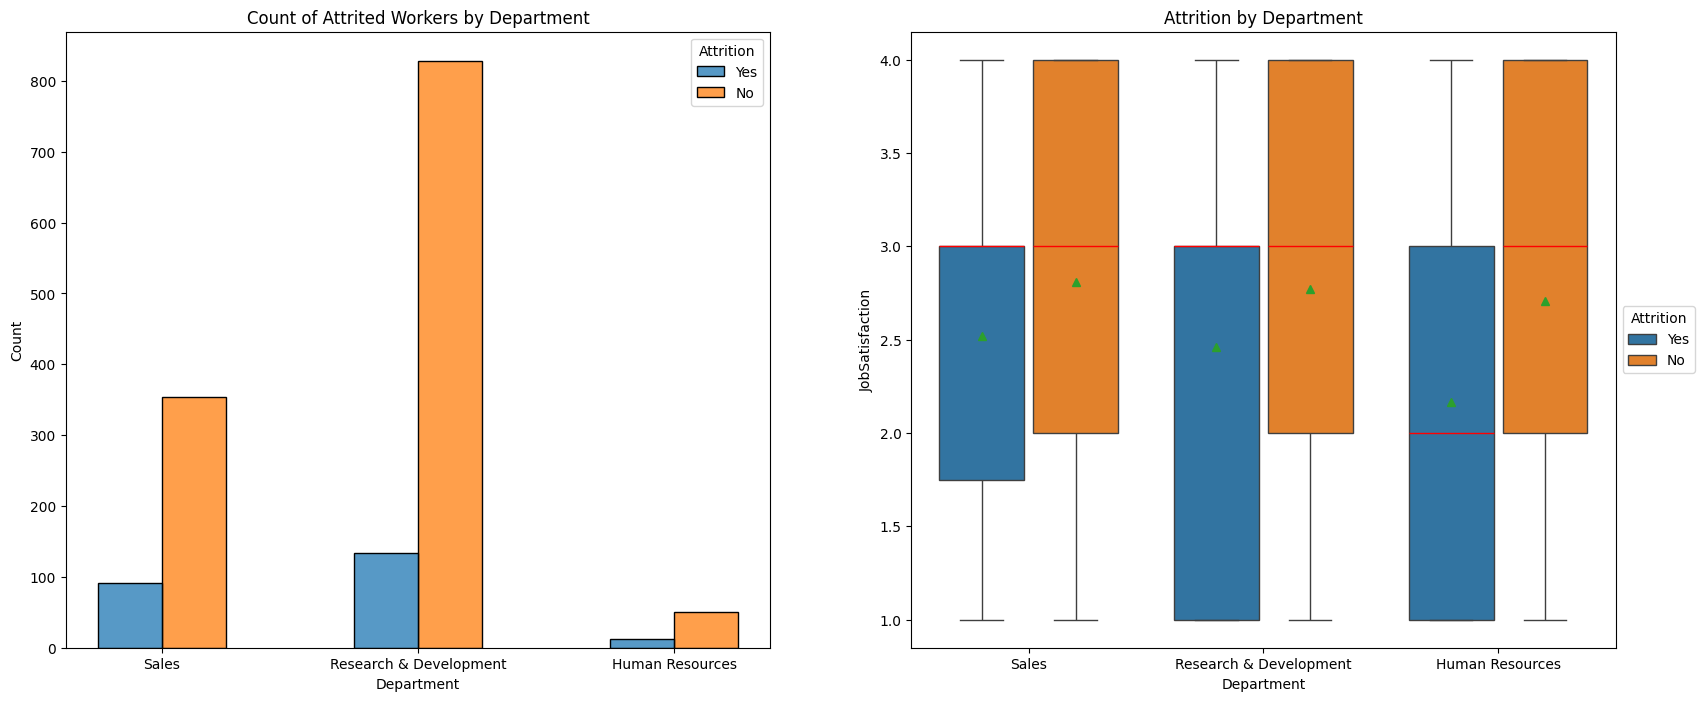

In [115]:
# Plotting relationship between department and attrition count
fig, axes = plt.subplots(1, 2, figsize = (20,8))

sns.histplot(data = df, x = "Department", hue = "Attrition", multiple = 'dodge', shrink = 0.5, ax = axes[0])
axes[0].set_title("Count of Attrited Workers by Department")

sns.boxplot(data = df, x = "Department", y = "JobSatisfaction", hue = "Attrition", gap = 0.1, medianprops={"color": "red"}, showmeans = True, ax = axes[1])
axes[1].set_title("Attrition by Department")
axes[1].legend(loc="center left", bbox_to_anchor=(1, 0.5), title = 'Attrition')

We see that no department has a particularly outsized attrition rate. However, the difference in median and mean satisfaction scores between the employees who left and stayed appear to be larger in the Human Resources department.

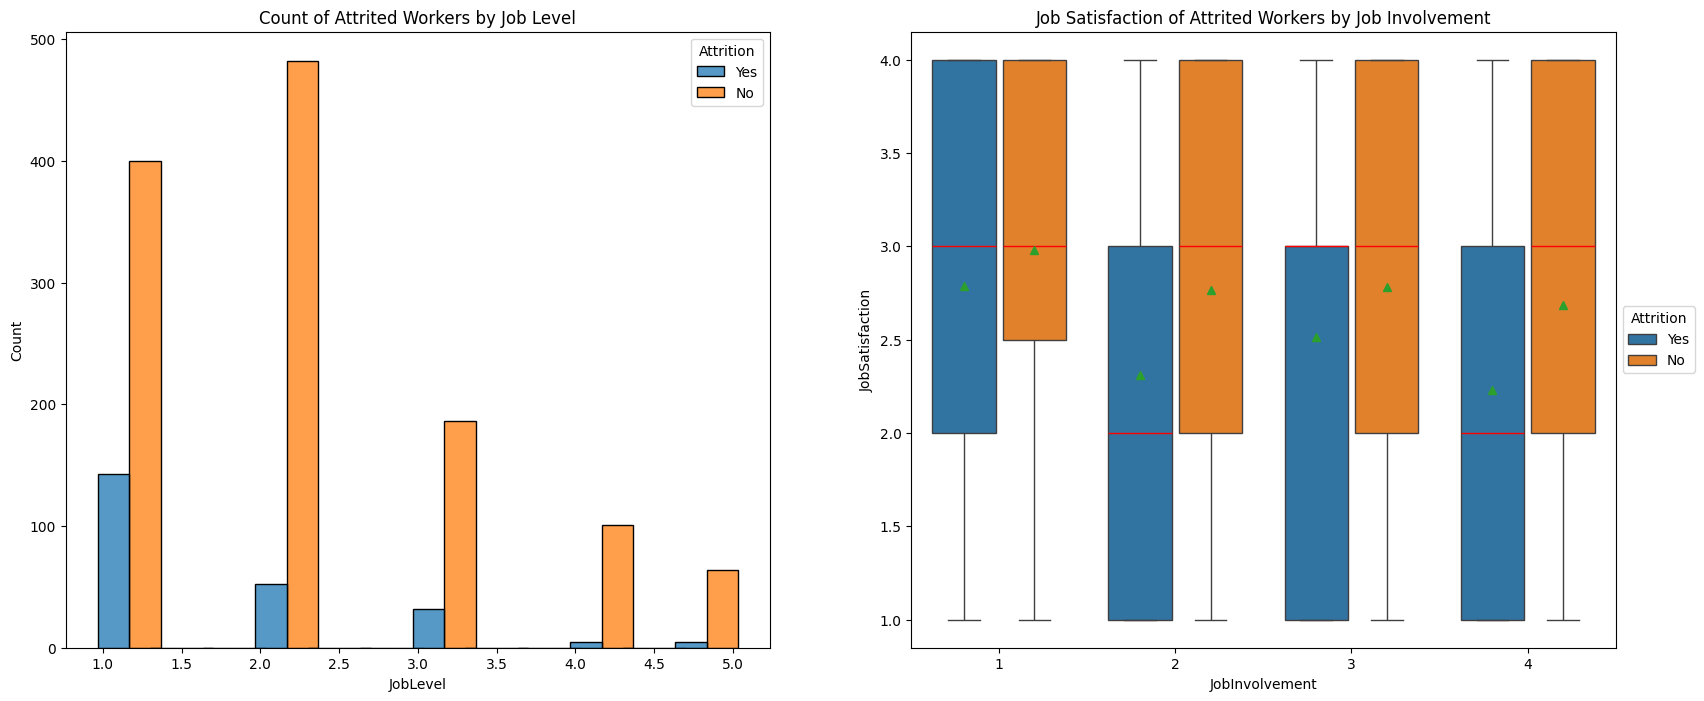

In [116]:
# Plotting relationship between department and attrition count
fig, axes = plt.subplots(1, 2, figsize = (20,8))

sns.histplot(data = df, x = "JobLevel", hue = "Attrition", multiple = 'dodge', shrink = 1.2, ax = axes[0])
axes[0].set_title("Count of Attrited Workers by Job Level")

sns.boxplot(data = df, x = "JobInvolvement", y = "JobSatisfaction", hue = "Attrition", gap = 0.1, medianprops={"color": "red"}, showmeans = True, ax = axes[1])
axes[1].set_title("Job Satisfaction of Attrited Workers by Job Involvement")
axes[1].legend(loc="center left", bbox_to_anchor=(1, 0.5), title = 'Attrition')

The attrition rate in workers in lower job levels appear to be higher. We can investigate this further.

Whereas the level of involvement an employee has in their job does not correlate with how satisfied they are. Across the board, employees who have left have lower job satisfaction scores.

In [117]:
# Chi-squared test for independence

# Create a contingency table
contingency_table = pd.crosstab(df['JobLevel'], df['Attrition'])

# Conduct the Chi-Square test
p = stats.chi2_contingency(contingency_table)[1]
print('P-Value:', p)

P-Value: 6.634684715458957e-15


The low p-value obtained means we can reject the null hypothesis at the 1% level of significance that attrition rate is independent of the employee's job level.

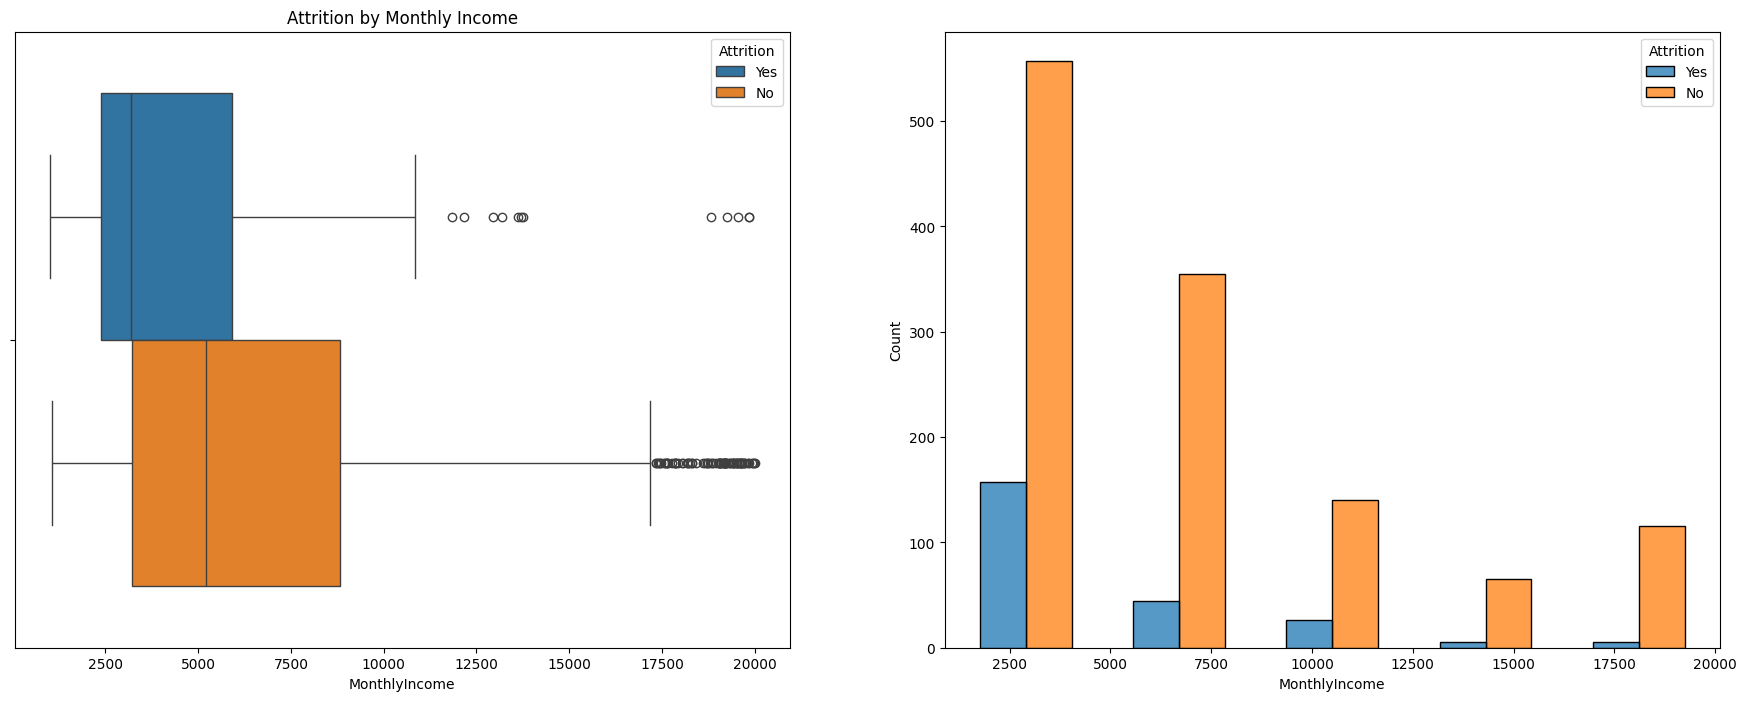

In [60]:
# Plotting relationship between monthly income and attrition rate
fig, axes = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data = df, x = "MonthlyIncome", hue = "Attrition", ax = axes[0])
sns.histplot(data = df, x = "MonthlyIncome", hue = "Attrition", bins = 5, multiple = 'dodge', shrink = 0.6, ax = axes[1])
axes[0].set_title("Attrition by Monthly Income")
plt.show()

Employees who have left have a lower median income that existing employees. In the histogram, we also see that the attrition rate is higher for employees in the lower income brackets. We can examine the statistical significance of this difference.

In [67]:
# Chi-squared test for independence
income_labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']
df['IncomeBracket'] = pd.qcut(df['MonthlyIncome'], 5, labels=income_labels)

# Create a contingency table
contingency_table = pd.crosstab(df['IncomeBracket'], df['Attrition'])

# Conduct the Chi-Square test
p = stats.chi2_contingency(contingency_table)[1]
print('P-Value:', p)

P-Value: 2.105600475281734e-14


By splitting employee income into five brackets, we can conduct a chi-squared test for independence.

The low p-value obtained means we can reject the null hypothesis at the 1% level of significance that attrition rate is independent of the employee's income bracket.

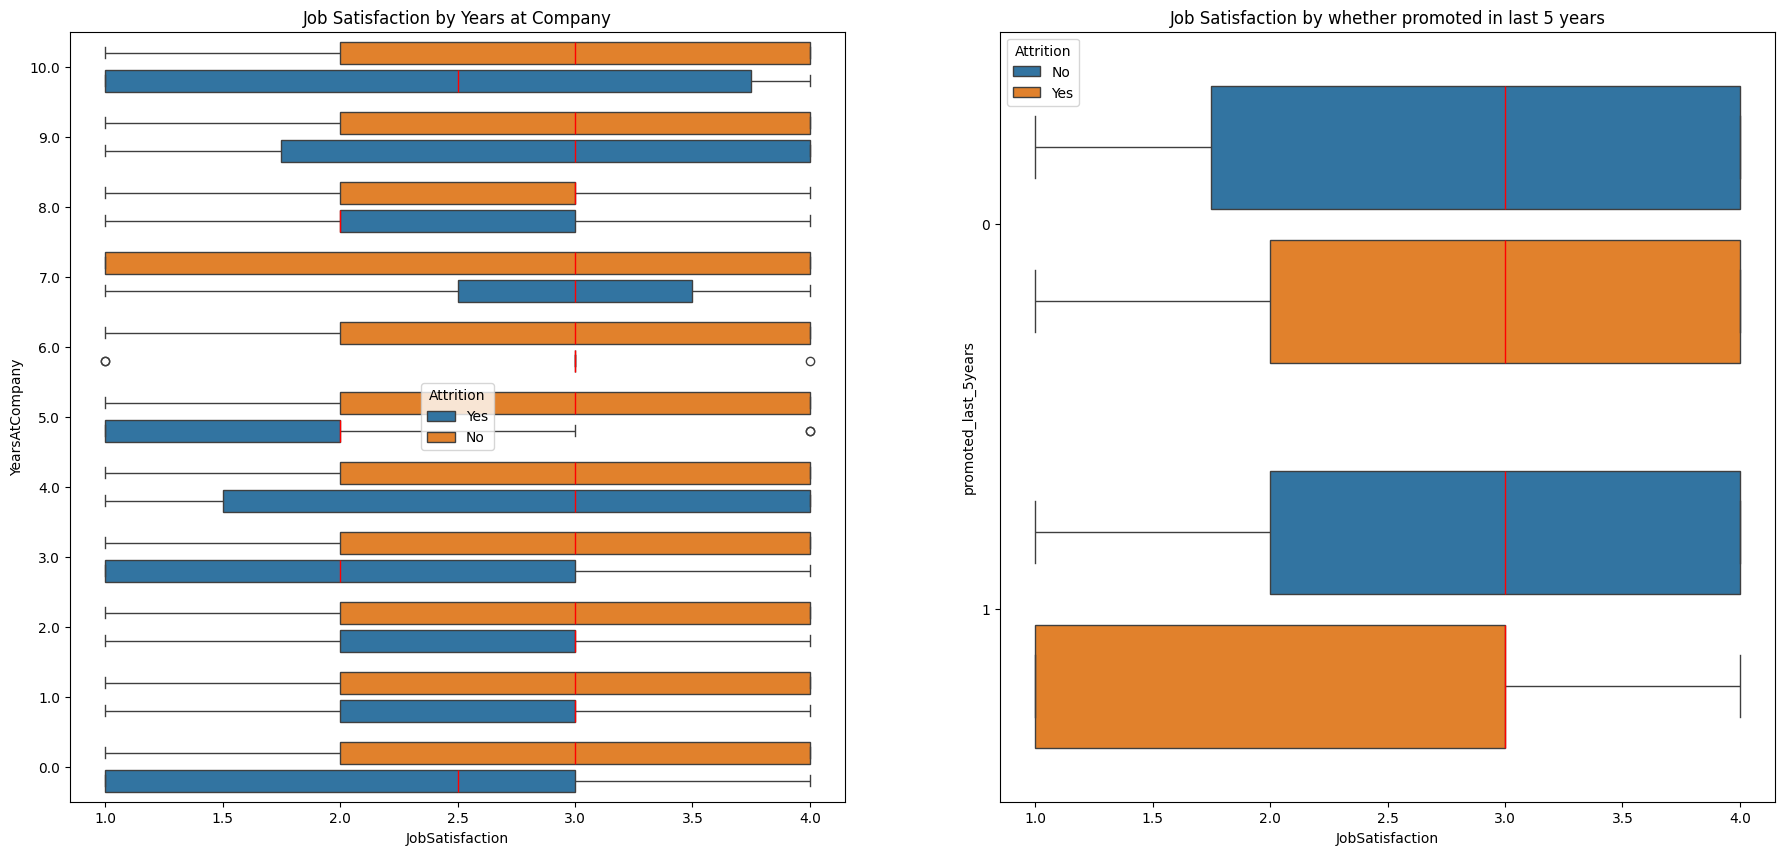

In [153]:

fig, axes = plt.subplots(1, 2, figsize = (22, 10))

# Plotting relationship between total working years, job satisfaction and attrition rate
sns.boxplot(data = df, x = 'JobSatisfaction', y = df[df['YearsAtCompany'] <= 10]['YearsAtCompany'], hue = 'Attrition', orient="h", gap = 0.2, medianprops={"color": "red"}, ax = axes[0])
axes[0].invert_yaxis()
axes[0].set_title("Job Satisfaction by Years at Company")

# Plotting relationship between promotions in the last 5 years, job satisfaction and attrition rate
df["promoted_last_5years"] = np.where(df['YearsSinceLastPromotion'] <= 5, 1, 0)
sns.boxplot(data = df, x = 'JobSatisfaction', y = "promoted_last_5years", hue = 'Attrition', orient="h", gap = 0.2, medianprops={"color": "red"}, ax = axes[1])
axes[1].set_title("Job Satisfaction by whether promoted in last 5 years")

plt.show()

From the data, it appears that total working years of an employee and whether or not they have been promoted in the last 5 years does not have much correlation with whether or not the worker will leave.

## Step 4: Insights & Recommendations

***Insights***

From this section, the main takeaways are that:
- The employee's ***job level and income bracket*** appear to be most strongly correlated with whether or not the employee leaves.
- Factors like job involvement, total working years, and whether or not the worker has been promoted in the last 5 years have little correlation with the employee's attrition rate.
- There is a noticeable difference in median satisfaction scores between the employees who left versus those who stayed appear in the Human Resources department, unlike other departments.
- However, no department appears to have an outsized attrition rate relative to others.

***Issues with Dataset***
- This dataset appears to have many inconsistencies, with the hourly, daily, and monthly rate of employees not tallying.
- Moreover, every employee has worked the same average monthly hours of 80, which is highly unlikely.
- The performance rating of employees only have values of 3 and 4, resulting in difficulty analysing trends relating to employee performance.

***Recommendations***
- A predictive model can be built to forecast which employees might leave the company. Some potential predictor variables include the employee's job level and income bracket.
- For more accurate analysis of employee attrition, new data should be collected, with previous identified issues resolved.